In [2]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

The following lines need to be used if data the from downloaded dataset should be used. The location of the ``Data`` folder needs to be specified by the parameter ``DATA_FOLDER_PATH`` in the file ``input_params.json``. 

If you want to analyse your own dataset you need to set the variable ``file_path`` to the folder where the simulation is located. Importantly, in this folder there should only be located exactly one simulation.

In [3]:
file_path_input_params_json = '../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'fig_5/variance_lipids'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path = '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids'
parameter_path = os.path.join(file_path, 'parameter_set.csv')

file_path /home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids
parameter_path /home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/parameter_set.csv


In [4]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [5]:
v_init_exp = 0.28
std_exp = 0.05

In [6]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)
data_frame.simu_name

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/variances_models_1000.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/titration_longer',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/variances_models.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/variances_models_combined_short.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/switch_titration_lipid_noise_longer_5000',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/variances_models_5000_not_expl.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/switch_lipid_noise_5000',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/variance_lipids/Fig_3C_poster.pdf',
 '/hom

0                             titration_longer
1                             titration_longer
2                             titration_longer
3                             titration_longer
4                             titration_longer
5                             titration_longer
6                             titration_longer
7                             titration_longer
8                             titration_longer
9                             titration_longer
10    switch_titration_lipid_noise_longer_5000
11    switch_titration_lipid_noise_longer_5000
12    switch_titration_lipid_noise_longer_5000
13    switch_titration_lipid_noise_longer_5000
14    switch_titration_lipid_noise_longer_5000
15    switch_titration_lipid_noise_longer_5000
16    switch_titration_lipid_noise_longer_5000
17    switch_titration_lipid_noise_longer_5000
18    switch_titration_lipid_noise_longer_5000
19    switch_titration_lipid_noise_longer_5000
20                     switch_lipid_noise_5000
21           

# Calculate initiation volume theoretically

In [7]:
def calculate_v_initi_no_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))-((production_rate_dars1+ df.production_rate_dars2)/df.production_rate_lipids)

def calculate_v_initi_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return (df.destruction_rate_datA + df.high_rate_datA + df.destruction_rate_rida) / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))- \
           ((production_rate_dars1 + df.production_rate_dars2 + df.high_rate_dars2)/df.production_rate_lipids)

data_frame["v_init_per_n_ori_th_no_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame["v_init_per_n_ori_th_o_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame.v_init_per_n_ori

0     0.265696
1     0.136597
2     0.134348
3     0.233117
4     0.091350
5     0.092456
6     0.138529
7     0.131882
8     0.243730
9     0.254661
10    0.355387
11    0.371575
12    0.353764
13    0.343136
14    0.339438
15    0.321106
16    0.377229
17    0.321859
18    0.342749
19    0.340982
20    0.368600
21    0.321736
22    0.346649
23    0.298596
24    0.567696
25    0.718709
26    0.355382
27    0.501154
28    0.265919
29    0.300277
Name: v_init_per_n_ori, dtype: float64

In [8]:
def calculate_v_init_switch_synthesis(df):
    if df.include_synthesis==0:
        return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
               (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
               ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))
    else:
        return (df.destruction_rate_datA/df.total_conc) * \
                df.frac_init / (df.michaelis_const_destr/df.total_conc+ df.frac_init) * \
                (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init) / \
                ((1- df.frac_init) * \
                (df.production_rate_lipids/df.total_conc + df.rate_growth * (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init)))
    
data_frame["v_init_per_n_ori_synthesis"] = data_frame.apply(lambda row: calculate_v_init_switch_synthesis(row), axis=1)


# Calculate CV

In [9]:
for simu_name in data_frame.simu_name.unique():
    simu_df = data_frame[data_frame["simu_name"] == simu_name]
    print(simu_name)
    data_frame.loc[data_frame['simu_name'] == simu_name, 'mean_v_init_per_n_ori'] = np.mean(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'stdd_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'cv_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])/np.mean(simu_df["v_init_per_n_ori"])

titration_longer
switch_titration_lipid_noise_longer_5000
switch_lipid_noise_5000


# Calculate variance at different growth rates

In [10]:
def return_array_of_initiation_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init']

def calculate_CV_v_init(row):
    v_init_per_ori, t_init = return_array_of_initiation_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    return np.std(v_init_np[10:])/np.mean(v_init_np[10:])

In [11]:
data_frame["CV_v_init"] = data_frame.apply(lambda row: calculate_CV_v_init(row), axis=1)
data_frame.CV_v_init

0     0.000100
1     0.246007
2     0.234215
3     0.000234
4     0.338525
5     0.318021
6     0.258325
7     0.221658
8     0.000190
9     0.000143
10    0.028312
11    0.041772
12    0.040242
13    0.025691
14    0.033271
15    0.031320
16    0.024948
17    0.036507
18    0.025504
19    0.024902
20    0.172999
21    0.084443
22    0.093300
23    0.110915
24    0.061920
25    0.051227
26    0.099155
27    0.083674
28    0.120307
29    0.125275
Name: CV_v_init, dtype: float64

# Make Legends

In [12]:
def make_production_rate_datA_lipids_cv_legend(destruction_rate_datA, production_rate_lipids, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, $\alpha_{{\rm lipids}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3), 
                                                                                       np.round(cv,3))

def make_production_rate_datA_cv_legend(destruction_rate_datA, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3),
                                                        np.round(cv,3))

def make_production_rate_datA_legend(destruction_rate_datA):
    return r'$\beta_{{\rm datA}}={}$ min$^{{-1}}$'.format(int(destruction_rate_datA/60))

def make_production_rate_datA_lipids_legend(destruction_rate_datA, production_rate_lipids):
    return r'$\beta_{{\rm datA}}={}$ /h, \linebreak  $\alpha_{{\rm lipids}}={}$ /h'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3))

def make_theoretical_v_init_legend(v_init_per_n_ori_th_no_time_varying):
    return r'$v^\ast_{{\rm th}}={} \, \mu $m$^3$'.format(np.round(v_init_per_n_ori_th_no_time_varying,3))

def make_legend_model(version_of_model, n_sites, block_production):
    if version_of_model == 'titration':
        if block_production == 0:
            return 'titration'
        else:
            return 'titration+SeqA'
    if n_sites==0:
        return 'LDDR'
    else:
        if block_production == 0:
            return 'LDDR+titration'
        else:
            return 'LDDR+titration+SeqA'

def make_order(legend_models):
    if legend_models == 'titration':
        return 1
    if legend_models == 'titration+SeqA':
        return 2
    if legend_models == 'LDDR':
        return 3
    if legend_models == 'LDDR+titration+SeqA':
        return 4
    


data_frame.loc[:, 'legend_datA_lipids_cv'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_cv_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA_cv'] = data_frame.apply(lambda row: make_production_rate_datA_cv_legend(row.destruction_rate_datA,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA'] = data_frame.apply(lambda row: make_production_rate_datA_legend(row.destruction_rate_datA), axis = 1)

data_frame.loc[:, 'legend_datA_lipids'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids), axis = 1)

data_frame.loc[:, 'legend_v_init_th'] = data_frame.apply(lambda row: make_theoretical_v_init_legend(row.v_init_per_n_ori_th_no_time_varying), axis = 1)

data_frame.loc[:, 'legend_models'] = data_frame.apply(lambda row: make_legend_model(row.version_of_model, row.n_c_max_0, row.block_production), axis = 1)

data_frame.loc[:, 'legend_order'] = data_frame.apply(lambda row: make_order(row.legend_models), axis = 1)


# Determine minimal activator fraction

In [13]:
def determine_min_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.min(fractions[int(fractions.size/2):])

def determine_max_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.max(fractions[int(fractions.size/2):])

data_frame.loc[:, 'min_frac'] = data_frame.apply(lambda row: determine_min_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame.loc[:, 'max_frac'] = data_frame.apply(lambda row: determine_max_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame['amplitude_frac'] = data_frame['max_frac']-data_frame['min_frac']
data_frame['relative_change_frac']= data_frame['min_frac']/data_frame['max_frac']

# Plot initiation volume per origin

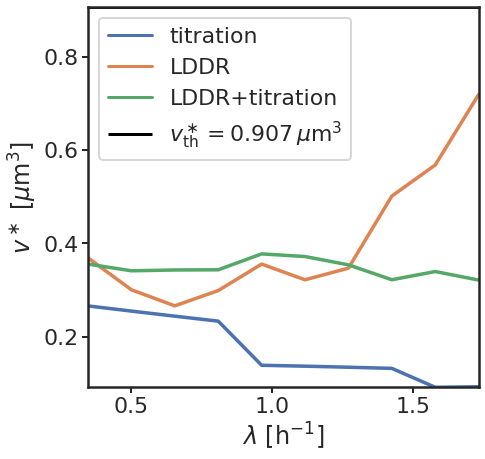

In [14]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='v_init_per_n_ori',
    data=data_frame.sort_values(by=["destruction_rate_datA"], ascending=False),
    hue='legend_models',
#     palette= [green, blue, pinkish_red], # yellow],
    linewidth = 3.5,
    ax=ax
);
# ax.lines[0].set_linestyle("--")
# ax.lines[1].set_linestyle("--")
# ax.lines[2].set_linestyle("--")
# ax.lines[3].set_linestyle("--")
ax.margins(0)

# Theoretical prediction
ax.hlines(data_frame['v_init_per_n_ori_th_no_time_varying'][0], 
            data_frame['rate_growth'].min(), 
            data_frame['rate_growth'].max(), 
            color='black', 
            linestyle='-',
            label= data_frame['legend_v_init_th'].iloc[0])
# Experimental results
# ax.hlines(v_init_exp, 
#             data_frame['rate_growth'].min(), 
#             data_frame['rate_growth'].max(), 
#             color='black', 
#             label= r'$v^\ast_{{\rm exp}}={} \, \mu m^3$'.format(v_init_exp))
# upper_bound = np.array(data_frame['v_init_per_n_ori_th_no_time_varying']) + std_exp
# lower_bound = np.array(data_frame['v_init_per_n_ori_th_no_time_varying']) - std_exp
# ax.axhspan(upper_bound[0], lower_bound[0], facecolor='black', alpha=0.1)

ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'$v^\ast$ [$\mu$m$^3$]')
# ax.set(ylim=(0,0.45))
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/Fig_3C_poster.pdf', format='pdf', bbox_inches='tight')

# Plot amplitude time varying

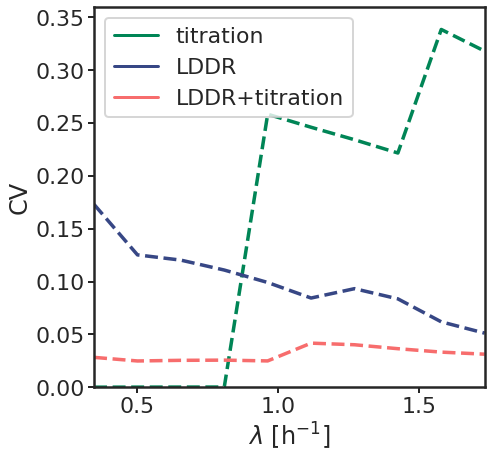

In [15]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='CV_v_init',
    data=data_frame.sort_values(by=["legend_order"]),
    hue='legend_models',
#     dashes=[(4, 1), (4, 1), (4, 1), (4, 1)],
    markers=True,
    palette= [green, blue, pinkish_red],
    linewidth = 3.5,
    ax=ax
);
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")
# ax.lines[3].set_linestyle("--")
ax.margins(0)
ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'CV')
# plt.legend(labels=legend
ax.set(ylim=(0,0.36))
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/variances_models.pdf', format='pdf', bbox_inches='tight')